# Clustering & Linear regression for MPG on clusters thus formed.

#### Importing neccesary libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading & Cleaning of Data

In [3]:
df = pd.read_csv('cars-dataset.csv')
df.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
369,chevrolet cavalier 2-door,4,112.0,88,2395,18.0,82,34.0
226,buick skylark,6,231.0,105,3425,16.9,77,20.5
96,amc ambassador brougham,8,360.0,175,3821,11.0,73,13.0
252,pontiac phoenix lj,6,231.0,105,3535,19.2,78,19.2
316,dodge aspen,6,225.0,90,3381,18.7,80,19.1
227,plymouth volare custom,6,225.0,100,3630,17.7,77,19.0
164,buick skyhawk,6,231.0,110,3039,15.0,75,21.0
324,datsun 210,4,85.0,65,2110,19.2,80,40.8
108,toyota carina,4,97.0,88,2279,19.0,73,20.0
145,datsun 710,4,83.0,61,2003,19.0,74,32.0


#### Checking shape,data type and missing values as well as special characters.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB



I have tried to change the object type of hp to int,but it has thrown error which means there are special charatcers in this specific column which needed to be impute/drop first before converting the column to int type.
#### Treating special characters & other issues and changing 'HP' column to int type


In [5]:
df['hp'].dtypes

dtype('O')

Checking special characters

In [6]:
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

#### checking no. of special characters and corrosponding rows.

In [8]:
df[df['hp']=='?'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
32,?,ford pinto,4,2046,25.0,98.0,19.0
126,?,ford maverick,6,2875,21.0,200.0,17.0
330,?,renault lecar deluxe,4,1835,40.9,85.0,17.3
336,?,ford mustang cobra,4,2905,23.6,140.0,14.3
354,?,renault 18i,4,2320,34.5,100.0,15.8
374,?,amc concord dl,4,3035,23.0,151.0,20.5


#### Imputation/Dropping

In [9]:
df[df['car name']=='ford pinto'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
32,?,ford pinto,4,2046,25.0,98.0,19.0
112,85,ford pinto,4,2310,19.0,122.0,18.5
130,80,ford pinto,4,2451,26.0,122.0,16.5
168,83,ford pinto,4,2639,23.0,140.0,17.0
174,97,ford pinto,6,2984,18.0,171.0,14.5
206,72,ford pinto,4,2565,26.5,140.0,13.6


Since the values for this particular instance is high mpg ,lower weight and 4 cylinders ,the most appropriate imputing value as per given data for the missing value should be min of ford pinto cars i.e. 72.The resason for the same is, lower weight ,high mpg and low count of cylinders is characterstic for small cars with small HP usually.

In [10]:
print(df.loc[32,'hp'])
df.loc[32,'hp']=72 
df.loc[32,'hp']

?


72

In [11]:
df[df['car name']=='ford maverick'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
17,85,ford maverick,6,2587,21.0,200.0,16.0
100,88,ford maverick,6,3021,18.0,250.0,16.5
126,?,ford maverick,6,2875,21.0,200.0,17.0
155,72,ford maverick,6,3158,15.0,250.0,19.5
193,81,ford maverick,6,3012,24.0,200.0,17.6


Since the values for this particular instance is high mpg medium weight and 6 cylinders ,the most appropriate imputing value as per given data for the missing value should be median of ford pinto cars i.e. 83.The resason for the same is, medium weight ,high mpg and low count of cylinders are characterstics of medium cars with medium HP usually.Moreover comparing with other values mentioned in data for this specific brand and cylinder numbers as well as weight median seem to be appropriate.

In [12]:
print(df.loc[126,'hp'])
df.loc[126,'hp']=83 
df.loc[126,'hp']

?


83

In [13]:
df[df['car name']=='renault lecar deluxe'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
330,?,renault lecar deluxe,4,1835,40.9,85.0,17.3


In [14]:
df[(df['cyl'] == 4) & (df['wt']>=1800)& (df['mpg']>=40)&(df['disp']>=84)&(df['acc']>=17)][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
244,48,volkswagen rabbit custom diesel,4,1985,43.1,90.0,21.5
322,65,mazda glc,4,2110,46.6,86.0,17.9
324,65,datsun 210,4,2110,40.8,85.0,19.2
325,48,vw rabbit c (diesel),4,2085,44.3,90.0,21.7
326,48,vw dasher (diesel),4,2335,43.4,90.0,23.7
330,?,renault lecar deluxe,4,1835,40.9,85.0,17.3
394,52,vw pickup,4,2130,44.0,97.0,24.6


Going by the weight more than 1800,mpg greater than 40 and 4 cylinders ,disp of 85, and acceleration about 17,the nearest value is 65.

In [15]:
print(df.loc[330,'hp'])
df.loc[330,'hp']=65 
df.loc[330,'hp']

?


65

In [16]:
df[df['car name']=='ford mustang cobra'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
336,?,ford mustang cobra,4,2905,23.6,140.0,14.3


In [17]:
df[(df['cyl'] == 4) & (df['wt']>=2900)& (df['mpg']>=23)&(df['disp']>=130)&(df['acc']>=14)][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
299,71,peugeot 504,4,3190,27.2,141.0,24.8
315,90,amc concord,4,3003,24.3,151.0,20.1
328,67,mercedes-benz 240d,4,3250,30.0,146.0,21.8
336,?,ford mustang cobra,4,2905,23.6,140.0,14.3
359,80,peugeot 505s turbo diesel,4,3230,28.1,141.0,20.4
374,?,amc concord dl,4,3035,23.0,151.0,20.5
392,90,chevrolet camaro,4,2950,27.0,151.0,17.3


Going by the weight more than 2900,mpg greater than 23 and 4 cylinders ,disp of 140, and acceleration about 14,the nearest value as per data is median 75.

In [18]:
print(df.loc[336,'hp'])
df.loc[336,'hp']=75 
df.loc[336,'hp']

?


75

In [19]:
df[df['car name']=='renault 18i'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
354,?,renault 18i,4,2320,34.5,100.0,15.8


In [20]:
df[(df['cyl'] == 4) & (df['wt']>=2300)& (df['mpg']>=32)&(df['disp']>=90)&(df['acc']>=14)][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
320,92,datsun 510 hatchback,4,2434,37.0,119.0,15.0
326,48,vw dasher (diesel),4,2335,43.4,90.0,23.7
335,88,triumph tr7 coupe,4,2500,35.0,122.0,15.1
354,?,renault 18i,4,2320,34.5,100.0,15.8
356,75,toyota corolla,4,2350,32.4,108.0,16.8
357,100,datsun 200sx,4,2615,32.9,119.0,14.8
369,88,chevrolet cavalier 2-door,4,2395,34.0,112.0,18.0


Going by the weight more than 2300,mpg greater than 32 and 4 cylinders ,disp of 100, and acceleration about 15,the nearest value as per data is median 88 of this set of data.

In [21]:
print(df.loc[354,'hp'])
df.loc[354,'hp']=88
df.loc[354,'hp']

?


88

In [22]:
df[df['car name']=='amc concord dl'][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
374,?,amc concord dl,4,3035,23.0,151.0,20.5


In [23]:
df[(df['cyl'] == 4) & (df['wt']>=3000)& (df['mpg']>=23)&(df['disp']>=151)&(df['acc']>=20)][['hp','car name', 'cyl','wt','mpg','disp','acc']]

,hp,car name,cyl,wt,mpg,disp,acc
315,90,amc concord,4,3003,24.3,151.0,20.1
374,?,amc concord dl,4,3035,23.0,151.0,20.5


Going by the weight more than 3000,mpg greater than 23 and 4 cylinders ,disp of 151, and acceleration about 20,the nearest value as per data is about 90.

In [24]:
print(df.loc[374,'hp'])
df.loc[374,'hp']=90
df.loc[374,'hp']

?


90

In [25]:
df['hp'].describe(include='all')

count     398
unique     99
top       150
freq       22
Name: hp, dtype: object

In [26]:
df['hp']=df['hp'].astype(int)

In [27]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,  72, 100, 105, 175,
       153, 180, 110,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        83,  67,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

#### Checking the data after treating missing or special character values.

In [28]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,NaN,NaN,NaN,104.083,38.3428,46,75,92,125,230
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [31]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

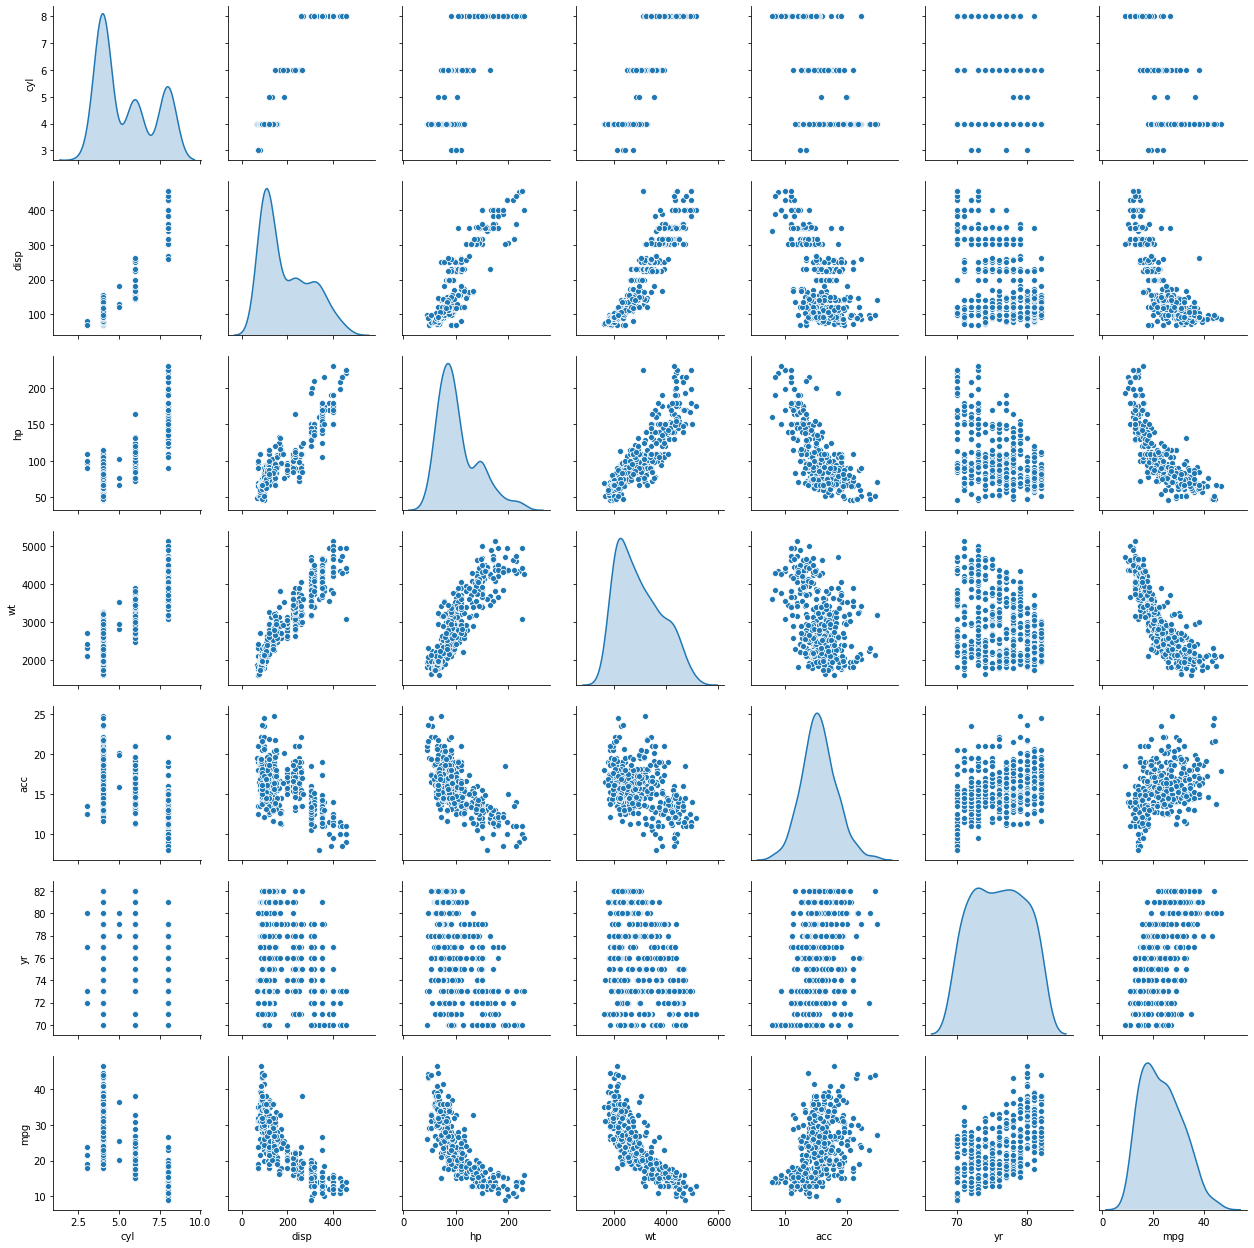

In [32]:
sns.pairplot(df, diag_kind ='kde')

Pair plot shows that with increase in the features like number of cylinders ,weight of car,horse power and displacement,Miles per gallon or fuel average decreases, where as with increase in acceleration and newer the model or lesser the age of model, the MPG increases.

In [33]:
df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.842782,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897208,0.932824,-0.543684,-0.370164,-0.804203
hp,0.842782,0.897208,1.000000,0.864224,-0.687613,-0.414340,-0.775747
wt,0.896017,0.932824,0.864224,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.687613,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.414340,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.775747,-0.831741,0.420289,0.579267,1.000000


### Scaling Data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaled_df= df.drop(['car name'],axis=1)

In [36]:
scaled_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [37]:
mm = MinMaxScaler()
scaled_df = mm.fit_transform(scaled_df)

In [38]:
scaled_df

array([[1.        , 0.61757106, 0.45652174, ..., 0.23809524, 0.        ,
        0.2393617 ],
       [1.        , 0.72868217, 0.64673913, ..., 0.20833333, 0.        ,
        0.15957447],
       [1.        , 0.64599483, 0.56521739, ..., 0.17857143, 0.        ,
        0.2393617 ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 0.21428571, 1.        ,
        0.61170213],
       [0.2       , 0.13436693, 0.17934783, ..., 0.63095238, 1.        ,
        0.50531915],
       [0.2       , 0.13178295, 0.19565217, ..., 0.67857143, 1.        ,
        0.58510638]])

## Clustering

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

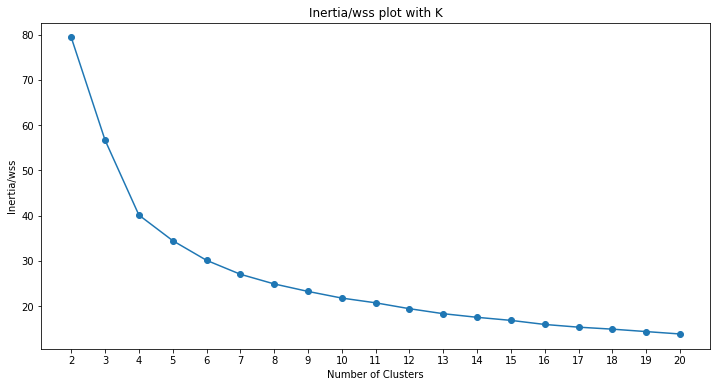

Silhouette-Score for 2 Clusters:  0.4656419720406889
Silhouette-Score for 3 Clusters:  0.3792359137197659
Silhouette-Score for 4 Clusters:  0.4041335103774468
Silhouette-Score for 5 Clusters:  0.3798000613698973
Silhouette-Score for 6 Clusters:  0.36992859239894077
Silhouette-Score for 7 Clusters:  0.3170051585118558
Silhouette-Score for 8 Clusters:  0.3032100097497801
Silhouette-Score for 9 Clusters:  0.2867622351731182
Silhouette-Score for 10 Clusters:  0.28211075733244856
Silhouette-Score for 11 Clusters:  0.2911145738735493
Silhouette-Score for 12 Clusters:  0.2762753530360712
Silhouette-Score for 13 Clusters:  0.2772001341733344
Silhouette-Score for 14 Clusters:  0.2780198833241653
Silhouette-Score for 15 Clusters:  0.24307167715483258
Silhouette-Score for 16 Clusters:  0.2680780916037463
Silhouette-Score for 17 Clusters:  0.2569055620896573
Silhouette-Score for 18 Clusters:  0.2518576312988495
Silhouette-Score for 19 Clusters:  0.2544832898081818
Silhouette-Score for 20 Clusters:

In [40]:
def inertia_plot(clust, X, start = 2, stop = 21):
    inertia = []
    for x in range(start,stop):
        k_means = clust(n_clusters = x)
        labels = k_means.fit_predict(X)
        inertia.append(k_means.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia/wss')
    plt.title('Inertia/wss plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()
inertia_plot(KMeans,scaled_df)
for x in range(2, 21):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(scaled_df)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(scaled_df, label))


Using the elbow method, we pick a good number of clusters to be 4.

In [41]:
def silh_samp_cluster(clust,  X, start=2, stop=21, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        k_means = clust(n_clusters = x)
        y_k_means = k_means.fit_predict(X)
        cluster_labels = np.unique(y_k_means)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_k_means, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_k_means == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

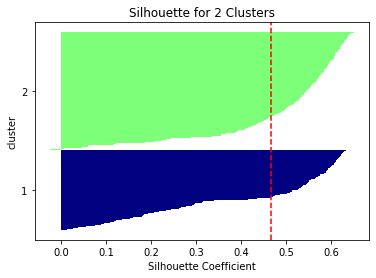

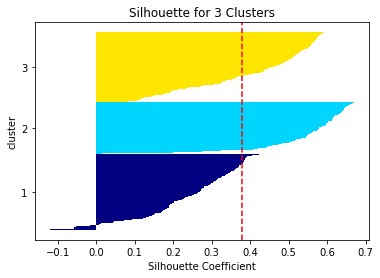

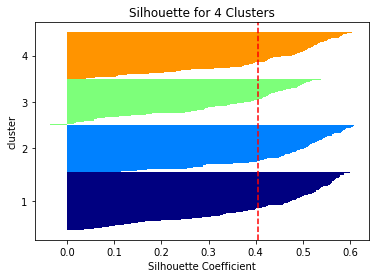

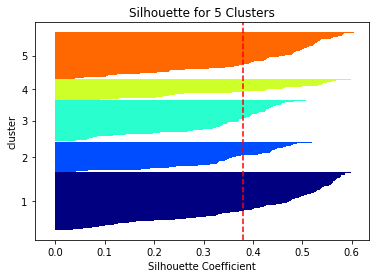

In [42]:
silh_samp_cluster(KMeans, scaled_df, stop=6)

The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to more diverse fluctuations in the size of the silhouette plots. However when comparing between thickness of plots for 2 and 4 clusters , all the plots are more or less of similar thickness and hence are of similar sizes with 4 cluster with  more uniformity in plots .All these reasons make 4 clusters a better choice.

In [43]:
kmeans4= KMeans(n_clusters=4,random_state=90)
kmeans4 = kmeans4.fit(scaled_df)
labels4 = kmeans4.predict(scaled_df)
centroids4 = kmeans4.cluster_centers_
print("Centroid values",centroids4)

Centroid values [[0.20689655 0.11627907 0.16482384 0.2054007  0.51231527 0.83836207
  0.61968085]
 [1.         0.72671727 0.62918931 0.7196626  0.27579365 0.29861111
  0.14616578]
 [0.62637363 0.39901184 0.30554228 0.45909265 0.49653323 0.503663
  0.28828618]
 [0.19368421 0.09923841 0.19273455 0.19458314 0.50739348 0.29035088
  0.43673012]]


#### Silhouette score 

In [44]:
silhouette_avg = silhouette_score(scaled_df,labels4)
print("For n_clusters = 4","The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.4041335103774468


#### Within Cluster Sum of Squares

In [45]:
wcss4 = kmeans4.inertia_
wcss4

40.10035033673914

## Cluster Profiling

In [46]:
df['labels'] = pd.DataFrame(kmeans4.labels_ , columns = list(['labels']))

In [47]:
pd.value_counts(df['labels']).sort_index()

0    116
1     96
2     91
3     95
Name: labels, dtype: int64

In [48]:
clust_profile=df
clust_profile=clust_profile.groupby('labels').median()
clust_profile['freq']=pd.value_counts(df['labels']).sort_index()
clust_profile

,cyl,disp,hp,wt,acc,yr,mpg,freq
labels,,,,,,,,
0,4.0,105.0,75,2222.5,16.2,80.0,32.05,116
1,8.0,350.0,150,4177.5,12.9,73.0,14.00,96
2,6.0,231.0,100,3245.0,16.0,76.0,19.20,91
3,4.0,104.0,83,2255.0,16.0,74.0,25.00,95


### Seperating different data frames on the basis of their specific cluster 

In [49]:
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'labels'], dtype='object')

## Data frame cluster 1 

In [50]:
DF1=df[df['labels']==0][['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
print(type(DF1))
print('Shape of DF1 :',DF1.shape)
DF1

<class 'pandas.core.frame.DataFrame'>
Shape of DF1 : (116, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
216,honda accord cvcc,4,98.0,68,2045,18.5,77,31.5
217,buick opel isuzu deluxe,4,111.0,80,2155,14.8,77,30.0
218,renault 5 gtl,4,79.0,58,1825,18.6,77,36.0
220,datsun f-10 hatchback,4,85.0,70,1945,16.8,77,33.5
233,volkswagen rabbit custom,4,97.0,78,1940,14.5,77,29.0
...,...,...,...,...,...,...,...,...
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0


## Data frame cluster 2

In [51]:
DF2=df[df['labels']==1][['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
print(type(DF2))
print('Shape of DF2 :' , DF2.shape)
DF2

<class 'pandas.core.frame.DataFrame'>
Shape of DF2 : (96, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
...,...,...,...,...,...,...,...,...
287,mercury grand marquis,8,351.0,138,3955,13.2,79,16.5
288,dodge st. regis,8,318.0,135,3830,15.2,79,18.2
289,buick estate wagon (sw),8,350.0,155,4360,14.9,79,16.9
290,ford country squire (sw),8,351.0,142,4054,14.3,79,15.5


## Data frame cluster 3

In [52]:
DF3=df[df['labels']==2][['car name','cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
print(type(DF3))
print('Shape of DF3 :', DF3.shape)
DF3

<class 'pandas.core.frame.DataFrame'>
Shape of DF3 : (91, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
15,plymouth duster,6,198.0,95,2833,15.5,70,22.0
16,amc hornet,6,199.0,97,2774,15.5,70,18.0
17,ford maverick,6,200.0,85,2587,16.0,70,21.0
24,amc gremlin,6,199.0,90,2648,15.0,70,21.0
33,amc gremlin,6,232.0,100,2634,13.0,71,19.0
...,...,...,...,...,...,...,...,...
364,oldsmobile cutlass ls,8,350.0,105,3725,19.0,81,26.6
365,ford granada gl,6,200.0,88,3060,17.1,81,20.2
366,chrysler lebaron salon,6,225.0,85,3465,16.6,81,17.6
386,buick century limited,6,181.0,110,2945,16.4,82,25.0


## Data frame cluster 4

In [53]:
DF4=df[df['labels']==3][['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']]
print(type(DF4))
print('Shape of DF4 :', DF4.shape)
DF4

<class 'pandas.core.frame.DataFrame'>
Shape of DF4 : (95, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
14,toyota corona mark ii,4,113.0,95,2372,15.0,70,24.0
18,datsun pl510,4,97.0,88,2130,14.5,70,27.0
19,volkswagen 1131 deluxe sedan,4,97.0,46,1835,20.5,70,26.0
20,peugeot 504,4,110.0,87,2672,17.5,70,25.0
21,audi 100 ls,4,107.0,90,2430,14.5,70,24.0
...,...,...,...,...,...,...,...,...
234,pontiac sunbird coupe,4,151.0,88,2740,16.0,77,24.5
235,toyota corolla liftback,4,97.0,75,2265,18.2,77,26.0
236,ford mustang ii 2+2,4,140.0,89,2755,15.8,77,25.5
242,bmw 320i,4,121.0,110,2600,12.8,77,21.5


## LinearRegression models for different data frames with mpg as target variable

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# DF1

In [55]:
DF1['car name']=preprocessing.LabelEncoder().fit_transform(DF1['car name'])
X = DF1.drop(['mpg'],axis='columns',inplace=False)
Y = DF1['mpg']
print(X.shape,Y.shape)

(116, 7) (116,)


     1,Before   2,After
216      31.5  3.449988
217      30.0  3.401197
218      36.0  3.583519
220      33.5  3.511545
233      29.0  3.367296
..        ...       ...
393      27.0  3.295837
394      44.0  3.784190
395      32.0  3.465736
396      28.0  3.332205
397      31.0  3.433987

[116 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016007062A48>,
      dtype=object)

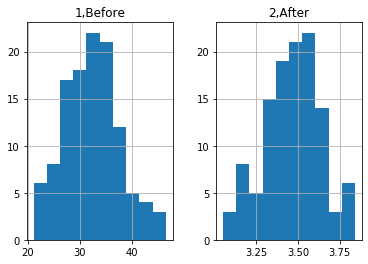

In [56]:
mpg = pd.DataFrame({"1,Before":Y,"2,After":np.log(Y)})
print(mpg)
mpg.hist()

In [57]:
Y=np.log(Y)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=6)
X_test.shape

(35, 7)

In [59]:
lgr = LinearRegression(fit_intercept=True)
modellin1 = lgr.fit(X_train,Y_train)
predicitonlin1= lgr.predict(X_test)

In [60]:
print('MSE :',mean_squared_error(Y_test,predicitonlin1))# MSE
print('RMSE :',  np.sqrt(mean_squared_error(Y_test,predicitonlin1)))#RMSE
print('Test R^2:' ,modellin1.score(X_test,Y_test)) # Test R^2
print('Train R^2 :',modellin1.score(X_train,Y_train))# Train R^2

MSE : 0.010869678593046151
RMSE : 0.10425775075765903
Test R^2: 0.7098058576852785
Train R^2 : 0.5765663350946348


In [61]:
for x, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lgr.coef_[x]))

The coefficient for car name is 0.00022337497817825466
The coefficient for cyl is 0.1149391212946237
The coefficient for disp is 0.0005441728937041557
The coefficient for hp is -0.0023993591674846557
The coefficient for wt is -0.0003295528270050704
The coefficient for acc is 0.009086058530025755
The coefficient for yr is 0.024935746714547177


# DF 2

In [62]:
DF2['car name']=preprocessing.LabelEncoder().fit_transform(DF2['car name'])
X = DF2.drop(['mpg'],axis='columns',inplace=False)
Y = DF2['mpg']
print(X.shape,Y.shape)

(96, 7) (96,)


     1,Before   2,After
0        18.0  2.890372
1        15.0  2.708050
2        18.0  2.890372
3        16.0  2.772589
4        17.0  2.833213
..        ...       ...
287      16.5  2.803360
288      18.2  2.901422
289      16.9  2.827314
290      15.5  2.740840
292      18.5  2.917771

[96 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160068A9488>,
      dtype=object)

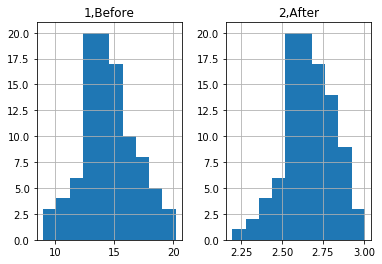

In [63]:
mpg = pd.DataFrame({"1,Before":Y,"2,After":np.log(Y)})
print(mpg)
mpg.hist()

In [64]:
Y=np.log(Y)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=6)
X_test.shape

(29, 7)

In [66]:
lgr = LinearRegression(fit_intercept=True)
modellin1 = lgr.fit(X_train,Y_train)
predicitonlin1= lgr.predict(X_test)

In [67]:
print('MSE :',mean_squared_error(Y_test,predicitonlin1))# MSE
print('RMSE :',  np.sqrt(mean_squared_error(Y_test,predicitonlin1)))#RMSE
print('Test R^2:' ,modellin1.score(X_test,Y_test)) # Test R^2
print('Train R^2 :',modellin1.score(X_train,Y_train))# Train R^2

MSE : 0.0073692743162056045
RMSE : 0.08584447749392854
Test R^2: 0.7072361010396551
Train R^2 : 0.5060086028257346


In [68]:
for x, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lgr.coef_[x]))

The coefficient for car name is -2.4248830956875596e-05
The coefficient for cyl is -2.168404344971009e-18
The coefficient for disp is -0.00023527575004035324
The coefficient for hp is -0.0019940198619323637
The coefficient for wt is -3.6119730453639474e-05
The coefficient for acc is -0.042578497769980087
The coefficient for yr is 0.02649284330996426


# DF 3

In [69]:
DF3['car name']=preprocessing.LabelEncoder().fit_transform(DF3['car name'])
X = DF3.drop(['mpg'],axis='columns',inplace=False)
Y = DF3['mpg']
print(X.shape,Y.shape)

(91, 7) (91,)


     1,Before   2,After
15       22.0  3.091042
16       18.0  2.890372
17       21.0  3.044522
24       21.0  3.044522
33       19.0  2.944439
..        ...       ...
364      26.6  3.280911
365      20.2  3.005683
366      17.6  2.867899
386      25.0  3.218876
389      22.0  3.091042

[91 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016006A52CC8>,
      dtype=object)

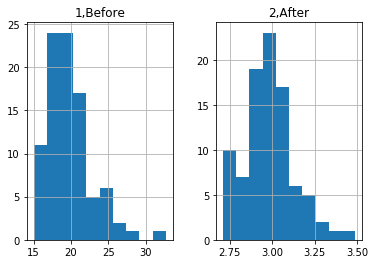

In [70]:
mpg = pd.DataFrame({"1,Before":Y,"2,After":np.log(Y)})
print(mpg)
mpg.hist()

In [71]:
Y=np.log(Y)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)
X_test.shape

(28, 7)

In [73]:
lgr = LinearRegression(fit_intercept=True)
modellin1 = lgr.fit(X_train,Y_train)
predicitonlin1= lgr.predict(X_test)

In [74]:
print('MSE :',mean_squared_error(Y_test,predicitonlin1))# MSE
print('RMSE :',  np.sqrt(mean_squared_error(Y_test,predicitonlin1)))#RMSE
print('Test R^2:' ,modellin1.score(X_test,Y_test)) # Test R^2
print('Train R^2 :',modellin1.score(X_train,Y_train))# Train R^2

MSE : 0.008281062220397399
RMSE : 0.0910003418696732
Test R^2: 0.5764581022048569
Train R^2 : 0.453179059538736


In [75]:
for x, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lgr.coef_[x]))

The coefficient for car name is -7.598338718749788e-05
The coefficient for cyl is 0.05298749832775059
The coefficient for disp is -0.0004637071708127849
The coefficient for hp is -0.0010805989366605825
The coefficient for wt is -0.0001576263554791837
The coefficient for acc is -0.01428231234461125
The coefficient for yr is 0.02186116713305833


# DF 4

In [76]:
DF4['car name']=preprocessing.LabelEncoder().fit_transform(DF4['car name'])
X = DF4.drop(['mpg'],axis='columns',inplace=False)
Y = DF4['mpg']
print(X.shape,Y.shape)

(95, 7) (95,)


     1,Before   2,After
14       24.0  3.178054
18       27.0  3.295837
19       26.0  3.258097
20       25.0  3.218876
21       24.0  3.178054
..        ...       ...
234      24.5  3.198673
235      26.0  3.258097
236      25.5  3.238678
242      21.5  3.068053
243      21.5  3.068053

[95 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016006B57C48>,
      dtype=object)

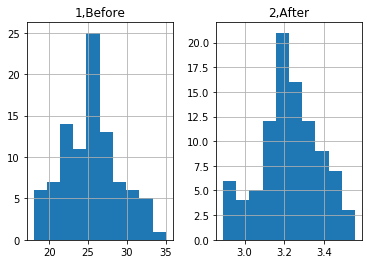

In [77]:
mpg = pd.DataFrame({"1,Before":Y,"2,After":np.log(Y)})
print(mpg)
mpg.hist()

In [78]:
Y=np.log(Y)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=45)
X_test.shape

(29, 7)

In [80]:
lgr = LinearRegression(fit_intercept=True)
modellin1 = lgr.fit(X_train,Y_train)
predicitonlin1= lgr.predict(X_test)

In [81]:
print('MSE :',mean_squared_error(Y_test,predicitonlin1))# MSE
print('RMSE :',  np.sqrt(mean_squared_error(Y_test,predicitonlin1)))#RMSE
print('Test R^2:' ,modellin1.score(X_test,Y_test)) # Test R^2
print('Train R^2 :',modellin1.score(X_train,Y_train))# Train R^2

MSE : 0.0043996258416260006
RMSE : 0.06632967542228743
Test R^2: 0.7421018022296217
Train R^2 : 0.6296310759554571


In [82]:
for x, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lgr.coef_[x]))

The coefficient for car name is -0.0008673865847774396
The coefficient for cyl is 0.3261030726649689
The coefficient for disp is -0.002040024367003555
The coefficient for hp is -0.0013899802244353404
The coefficient for wt is -0.00019553856302661574
The coefficient for acc is -0.009841314942021477
The coefficient for yr is 0.010771531773004866
